# Hand written digit classification using CNN

MNIST data: This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Normalize the data values range to (0-1) by dividing the array by 255.0

In [6]:
X_train=X_train/255.0
X_test=X_test/255.0

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Lets plot some samples using matplotlib

In [8]:
classes=["Zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]
def plot_sample(X,y,index):
    plt.figure(figsize=(3,3))
    plt.imshow(X[index])
    plt.title(classes[y[index]])

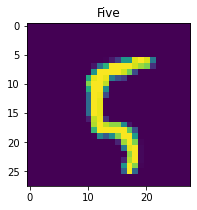

In [9]:
plot_sample(X_train,y_train,100)

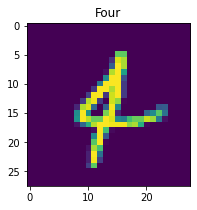

In [10]:
plot_sample(X_test,y_test,300)

Lets build ann to classify the digits into different categories

Input nodes:784

Hidden layer 1:1000

Hidden layer 2:500

Output nodes:10

In [11]:
from tensorflow.keras import models,datasets,layers
ann=models.Sequential([
layers.Flatten(input_shape=(28,28)),
layers.Dense(1000,activation='relu'),
layers.Dense(500,activation='relu'),
layers.Dense(10,activation='sigmoid')
])

In [12]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1896 - accuracy: 0.9427
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0812 - accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0579 - accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0436 - accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0378 - accuracy: 0.9883


In [14]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification report: \n", classification_report(y_test,y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.99      0.95      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Lets build CNN to classify the digits into different categories

In [15]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [16]:
cnn=models.Sequential([
    layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
   
    layers.Flatten(),
    
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1711 - accuracy: 0.9505
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0614 - accuracy: 0.9815
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0393 - accuracy: 0.9874
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0194 - accuracy: 0.9937


In [19]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 0s 978us/step - loss: 0.0753 - accuracy: 0.9795


[0.07532941550016403, 0.9794999957084656]

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0551 - accuracy: 0.9840


[0.05505753681063652, 0.984000027179718]